In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# CSV 파일 불러오기
data = pd.read_csv("../merged_dataset/double_train/double_train.csv")
test_data = pd.read_csv("../extracted_keypoints/quickly_test/sj_type2_7.csv")

In [3]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X = data[feature_columns].values
Y = data['Label'].values

X_test = test_data[feature_columns].values
Y_test = test_data['Label'].values



# standardscaler로 데이터 정규화
scaler = StandardScaler()
scaler_test = StandardScaler()


X = scaler.fit_transform(X)
X_test = scaler_test.fit_transform(X_test)


X=X.astype(int)
Y=Y.astype(int)

X_test=X_test.astype(int)
Y_test=Y_test.astype(int)

In [4]:
# train-valid 데이터 분할 (80%, 20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression()

In [6]:
# 모델들 학습 및 평가
model.fit(X, Y)

LogisticRegression()

In [7]:
# 학습된 모델의 계수 확인
coef = model.coef_[0]
intercept = model.intercept_

In [8]:
# Odd ratio 계산
odds_ratio = np.exp(coef)
print("Odd ratio:", np.round(odds_ratio,2))

Odd ratio: [1.72 1.44 1.38 2.59 1.27 8.51 0.77 2.75 1.2  6.27 0.93 0.24 0.91 1.
 0.73 4.26 1.1  1.18 0.48 0.81 0.74 0.52 0.8  1.62 0.82 1.31 4.77]


In [9]:
for i, name in enumerate(feature_columns):
    print("Feature:", name)
    print("Odd ratio:", np.round(odds_ratio[i],2))
    print("----------------------------------------")

Feature: Head
Odd ratio: 1.72
----------------------------------------
Feature: Neck
Odd ratio: 1.44
----------------------------------------
Feature: RShoulder_X
Odd ratio: 1.38
----------------------------------------
Feature: RShoulder_Y
Odd ratio: 2.59
----------------------------------------
Feature: LShoulder_X
Odd ratio: 1.27
----------------------------------------
Feature: LShoulder_Y
Odd ratio: 8.51
----------------------------------------
Feature: RElbow_X
Odd ratio: 0.77
----------------------------------------
Feature: RElbow_Y
Odd ratio: 2.75
----------------------------------------
Feature: LElbow_X
Odd ratio: 1.2
----------------------------------------
Feature: LElbow_Y
Odd ratio: 6.27
----------------------------------------
Feature: RWrist_X
Odd ratio: 0.93
----------------------------------------
Feature: RWrist_Y
Odd ratio: 0.24
----------------------------------------
Feature: LWrist_X
Odd ratio: 0.91
----------------------------------------
Feature: LWrist_Y
Odd 

In [10]:
# odds_ratio 내림차순 정렬
sorted_index = np.argsort(odds_ratio)[::-1]
sorted_odds_ratio = odds_ratio[sorted_index]
sorted_feature_columns = np.array(feature_columns)[sorted_index]

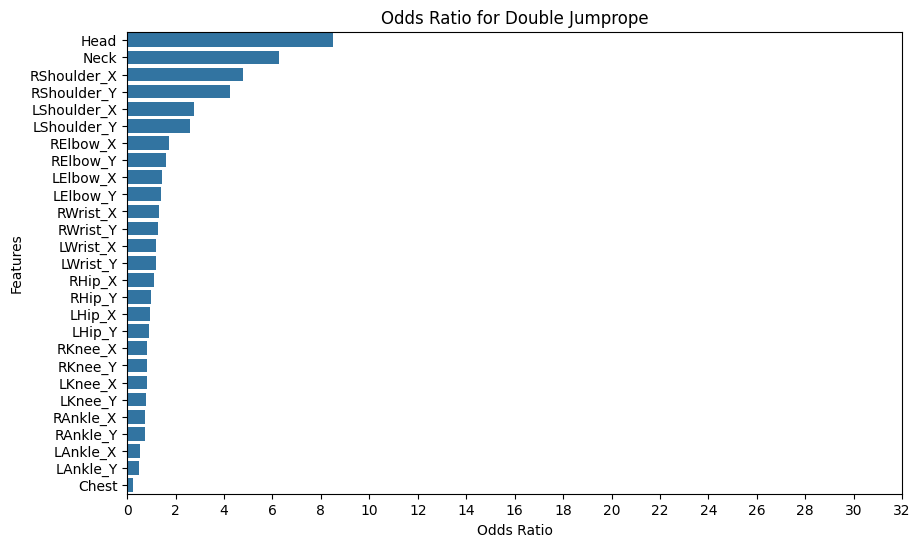

In [13]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_odds_ratio, y=feature_columns)
plt.xticks(np.arange(0,33,2))
plt.xlabel('Odds Ratio')
plt.ylabel('Features')
plt.title('Odds Ratio for Double Jumprope')
plt.show()